In [1]:
import pandas as pd
import numpy as np

In [6]:
path = "FormAdded.xlsx"
datatype = {"season_x": str, 
            "name": str, 
            "position":  str, 
            "team_x":  str, 
            "assists": int, 
            "bonus": int, 
            "bps": int, 
            "clean_sheets": int,
            "creativity": float, 
            "element": int,
            "fixture": int,
            "goals_conceded": int,
            "goals_scored": int,
            "ict_index": float,
            "influence": float,
            "kickoff_time": str,
            "minutes": int,
            "opponent_team": int,
            "opp_team_name": str,
            "own_goal": int,
            "penalties_missed": int,
            "penalties_saved": int,
            "red_cards": int,
            "round": int,
            "saves": int,
            "selected": int,
            "team_a_score": float,
            "team_h_score": float,
            "threat": float,
            "total_points": int,
            "transfers_balance": int,
            "transfers_in": int,
            "transfers_out": int,
            "value": int,
            "was_home": bool,
            "yellow_cards": int, 
            "GW": int,
            "ShortForm": float}

In [7]:
df = pd.read_excel(path, dtype = datatype)

In [18]:
df.head()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,ShortForm,OpponentScored,OpponentConceded
0,17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,0,0,0,55,False,0,1,0.0,0,0
1,17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,0,0,0,60,True,0,1,0.0,0,0
2,17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,0,0,0,80,True,0,1,0.0,0,0
3,17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,0,0,0,50,False,0,1,0.0,0,0
4,17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,0,0,0,45,True,1,1,0.0,0,0


In [20]:
#creating variable to record opposing teams' in last 5 games
df['OpponentScored'] = 0
df['OpponentConceded'] = 0
df.head()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,ShortForm,OpponentScored,OpponentConceded
0,17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,0,0,0,55,False,0,1,0.0,0,0
1,17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,0,0,0,60,True,0,1,0.0,0,0
2,17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,0,0,0,80,True,0,1,0.0,0,0
3,17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,0,0,0,50,False,0,1,0.0,0,0
4,17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,0,0,0,45,True,1,1,0.0,0,0


In [90]:
teams = pd.read_csv("Fantasy-Premier-League-master\Fantasy-Premier-League-master\data\master_team_list.csv")
teams.head()

,season,team,team_name
0,2016-17,1,Arsenal
1,2016-17,2,Bournemouth
2,2016-17,3,Burnley
3,2016-17,4,Chelsea
4,2016-17,5,Crystal Palace


In [92]:
#Changing season to numerical value
teams['season'] = np.where((teams.season == '2016-17'),17, teams.season)
teams['season'] = np.where((teams.season == '2017-18'),18, teams.season)
teams['season'] = np.where((teams.season == '2018-19'),19, teams.season)
teams['season'] = np.where((teams.season == '2019-20'),20, teams.season)
teams['season'] = np.where((teams.season == '2020-21'),21, teams.season)
teams['season'] = np.where((teams.season == '2021-22'),22, teams.season)

In [120]:
S22 = pd.read_csv(r"C:\Users\bosma_n5t6cpq\lighthouse-data-notes\FinalProject\Fantasy-Premier-League-master\Fantasy-Premier-League-master\data\2021-22\fixtures.csv")
S22.head()

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2210271,1,True,True,1,2021-08-13T19:00:00Z,90,False,True,1,0,3,2,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",4,2,66342
1,2210276,1,True,True,6,2021-08-14T11:30:00Z,90,False,True,10,1,13,5,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,4,66347
2,2210272,1,True,True,2,2021-08-14T14:00:00Z,90,False,True,4,2,5,1,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,2,66343
3,2210273,1,True,True,3,2021-08-14T14:00:00Z,90,False,True,7,0,6,3,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,4,66344
4,2210274,1,True,True,4,2021-08-14T14:00:00Z,90,False,True,16,1,8,3,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,2,66345


In [123]:
for t in teams[(teams['season'] == 22)]['team']:
    team = teams[(teams['season'] == 22)]['team_name'].iloc[(t-1)]
    S22.loc[S22['team_a'] == t, 'team_a'] = team
    S22.loc[S22['team_h'] == t, 'team_h'] = team
S22

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2210271,1,True,True,1,2021-08-13T19:00:00Z,90,False,True,Arsenal,0,Brentford,2,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",4,2,66342
1,2210276,1,True,True,6,2021-08-14T11:30:00Z,90,False,True,Leeds,1,Man Utd,5,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,4,66347
2,2210272,1,True,True,2,2021-08-14T14:00:00Z,90,False,True,Brighton,2,Burnley,1,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,2,66343
3,2210273,1,True,True,3,2021-08-14T14:00:00Z,90,False,True,Crystal Palace,0,Chelsea,3,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,4,66344
4,2210274,1,True,True,4,2021-08-14T14:00:00Z,90,False,True,Southampton,1,Everton,3,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,2,66345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2210646,38,True,True,376,2022-05-22T15:00:00Z,90,False,True,Man Utd,0,Crystal Palace,1,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",3,2,66717
376,2210647,38,True,True,377,2022-05-22T15:00:00Z,90,False,True,Southampton,1,Leicester,4,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,3,66718
377,2210648,38,True,True,378,2022-05-22T15:00:00Z,90,False,True,Wolves,1,Liverpool,3,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,5,66719
378,2210649,38,True,True,379,2022-05-22T15:00:00Z,90,False,True,Aston Villa,2,Man City,3,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,5,66720


In [127]:
for t in teams[(teams['season'] == 22)]['team']:
    team = teams[(teams['season'] == 22)]['team_name'].iloc[(t-1)]
    S22.loc[S22['team_a'] == t, 'team_a'] = team
    S22.loc[S22['team_h'] == t, 'team_h'] = team
S22

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2210271,1,True,True,1,2021-08-13T19:00:00Z,90,False,True,Arsenal,0,Brentford,2,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",4,2,66342
1,2210276,1,True,True,6,2021-08-14T11:30:00Z,90,False,True,Leeds,1,Man Utd,5,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,4,66347
2,2210272,1,True,True,2,2021-08-14T14:00:00Z,90,False,True,Brighton,2,Burnley,1,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,2,66343
3,2210273,1,True,True,3,2021-08-14T14:00:00Z,90,False,True,Crystal Palace,0,Chelsea,3,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,4,66344
4,2210274,1,True,True,4,2021-08-14T14:00:00Z,90,False,True,Southampton,1,Everton,3,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,2,66345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2210646,38,True,True,376,2022-05-22T15:00:00Z,90,False,True,Man Utd,0,Crystal Palace,1,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",3,2,66717
376,2210647,38,True,True,377,2022-05-22T15:00:00Z,90,False,True,Southampton,1,Leicester,4,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,3,66718
377,2210648,38,True,True,378,2022-05-22T15:00:00Z,90,False,True,Wolves,1,Liverpool,3,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,5,66719
378,2210649,38,True,True,379,2022-05-22T15:00:00Z,90,False,True,Aston Villa,2,Man City,3,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,5,66720


In [14]:
S21 = pd.read_csv(r"C:\Users\bosma_n5t6cpq\lighthouse-data-notes\FinalProject\Fantasy-Premier-League-master\Fantasy-Premier-League-master\data\2020-21\fixtures.csv")
S21.head()

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2128288,1,True,True,2,2020-09-12T11:30:00Z,90,False,True,1,3,8,0,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,2,58898
1,2128287,1,True,True,1,2020-09-12T14:00:00Z,90,False,True,16,0,6,1,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,3,58897
2,2128289,1,True,True,3,2020-09-12T16:30:00Z,90,False,True,10,3,11,4,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,3,58899
3,2128293,1,True,True,6,2020-09-12T19:00:00Z,90,False,True,14,2,19,0,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,4,58903
4,2128292,1,True,True,5,2020-09-13T13:00:00Z,90,False,True,9,3,18,0,"[{'identifier': 'goals_scored', 'a': [{'value'...",4,2,58902


In [124]:
for t in teams[(teams['season'] == 21)]['team']:
    team = teams[(teams['season'] == 21)]['team_name'].iloc[(t-1)]
    S21.loc[S21['team_a'] == t, 'team_a'] = team
    S21.loc[S21['team_h'] == t, 'team_h'] = team
S21

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2128288,1,True,True,2,2020-09-12T11:30:00Z,90,False,True,Arsenal,3,Fulham,0,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,2,58898
1,2128287,1,True,True,1,2020-09-12T14:00:00Z,90,False,True,Southampton,0,Crystal Palace,1,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,3,58897
2,2128289,1,True,True,3,2020-09-12T16:30:00Z,90,False,True,Leeds,3,Liverpool,4,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,3,58899
3,2128293,1,True,True,6,2020-09-12T19:00:00Z,90,False,True,Newcastle,2,West Ham,0,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,4,58903
4,2128292,1,True,True,5,2020-09-13T13:00:00Z,90,False,True,Leicester,3,West Brom,0,"[{'identifier': 'goals_scored', 'a': [{'value'...",4,2,58902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2128661,38,True,True,374,2021-05-23T15:00:00Z,90,False,True,Crystal Palace,0,Liverpool,2,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,3,59271
376,2128662,38,True,True,375,2021-05-23T15:00:00Z,90,False,True,Everton,0,Man City,5,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",4,5,59272
377,2128663,38,True,True,376,2021-05-23T15:00:00Z,90,False,True,Burnley,0,Sheffield Utd,1,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,2,59273
378,2128664,38,True,True,377,2021-05-23T15:00:00Z,90,False,True,Southampton,0,West Ham,3,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,4,59274


In [15]:
S20 = pd.read_csv(r"C:\Users\bosma_n5t6cpq\lighthouse-data-notes\FinalProject\Fantasy-Premier-League-master\Fantasy-Premier-League-master\data\2019-20\fixtures.csv")
S20.head()

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,stats,team_a,team_a_difficulty,team_a_score,team_h,team_h_difficulty,team_h_score
0,1059702,1,True,True,1,2019-08-09T19:00:00Z,90,False,True,"[{'h': [{'value': 1, 'element': 183}, {'value'...",14,5,1,10,2,4
1,1059709,1,True,True,8,2019-08-10T11:30:00Z,90,False,True,"[{'h': [], 'a': [{'value': 3, 'element': 214},...",11,2,5,19,4,0
2,1059703,1,True,True,2,2019-08-10T14:00:00Z,90,False,True,"[{'h': [{'value': 1, 'element': 61}], 'a': [{'...",15,2,1,3,3,1
3,1059704,1,True,True,3,2019-08-10T14:00:00Z,90,False,True,"[{'h': [{'value': 2, 'element': 90}, {'value':...",16,3,0,5,3,3
4,1059705,1,True,True,4,2019-08-10T14:00:00Z,90,False,True,"[{'h': [], 'a': [], 'identifier': 'goals_score...",8,3,0,7,2,0


In [126]:
for t in teams[(teams['season'] == 20)]['team']:
    team = teams[(teams['season'] == 20)]['team_name'].iloc[(t-1)]
    S20.loc[S20['team_a'] == t, 'team_a'] = team
    S20.loc[S20['team_h'] == t, 'team_h'] = team
S20

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,stats,team_a,team_a_difficulty,team_a_score,team_h,team_h_difficulty,team_h_score
0,1059702,1,True,True,1,2019-08-09T19:00:00Z,90,False,True,"[{'h': [{'value': 1, 'element': 183}, {'value'...",Norwich,5,1,Liverpool,2,4
1,1059709,1,True,True,8,2019-08-10T11:30:00Z,90,False,True,"[{'h': [], 'a': [{'value': 3, 'element': 214},...",Man City,2,5,West Ham,4,0
2,1059703,1,True,True,2,2019-08-10T14:00:00Z,90,False,True,"[{'h': [{'value': 1, 'element': 61}], 'a': [{'...",Sheffield Utd,2,1,Bournemouth,3,1
3,1059704,1,True,True,3,2019-08-10T14:00:00Z,90,False,True,"[{'h': [{'value': 2, 'element': 90}, {'value':...",Southampton,3,0,Burnley,3,3
4,1059705,1,True,True,4,2019-08-10T14:00:00Z,90,False,True,"[{'h': [], 'a': [], 'identifier': 'goals_score...",Everton,3,0,Crystal Palace,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1060077,47,True,True,376,2020-07-26T15:00:00Z,90,False,True,"[{'h': [], 'a': [{'value': 1, 'element': 241},...",Man Utd,3,2,Leicester,4,0
376,1060078,47,True,True,377,2020-07-26T15:00:00Z,90,False,True,"[{'h': [{'value': 2, 'element': 215}, {'value'...",Norwich,4,0,Man City,2,5
377,1060079,47,True,True,378,2020-07-26T15:00:00Z,90,False,True,"[{'h': [{'value': 1, 'element': 554}], 'a': [{...",Liverpool,2,3,Newcastle,4,1
378,1060080,47,True,True,379,2020-07-26T15:00:00Z,90,False,True,"[{'h': [{'value': 2, 'element': 437}, {'value'...",Sheffield Utd,2,1,Southampton,3,3


In [16]:
S19 = pd.read_csv(r"C:\Users\bosma_n5t6cpq\lighthouse-data-notes\FinalProject\Fantasy-Premier-League-master\Fantasy-Premier-League-master\data\2018-19\fixtures.csv")
S19.head()

,code,deadline_time,deadline_time_formatted,event,event_day,finished,finished_provisional,id,kickoff_time,kickoff_time_formatted,minutes,provisional_start_time,started,stats,team_a,team_a_difficulty,team_a_score,team_h,team_h_difficulty,team_h_score
0,987597,2018-08-10T18:00:00Z,10 Aug 19:00,1,1,True,True,6,2018-08-10T19:00:00Z,10 Aug 20:00,90,False,True,"[{'goals_scored': {'a': [{'value': 1, 'element...",11,4,1,14,3,2
1,987598,2018-08-10T18:00:00Z,10 Aug 19:00,1,2,True,True,7,2018-08-11T11:30:00Z,11 Aug 12:30,90,False,True,"[{'goals_scored': {'a': [{'value': 1, 'element...",17,3,2,15,4,1
2,987592,2018-08-10T18:00:00Z,10 Aug 19:00,1,2,True,True,2,2018-08-11T14:00:00Z,11 Aug 15:00,90,False,True,"[{'goals_scored': {'a': [], 'h': [{'value': 1,...",5,3,0,2,2,2
3,987594,2018-08-10T18:00:00Z,10 Aug 19:00,1,2,True,True,3,2018-08-11T14:00:00Z,11 Aug 15:00,90,False,True,"[{'goals_scored': {'a': [{'value': 1, 'element...",7,2,2,9,2,0
4,987595,2018-08-10T18:00:00Z,10 Aug 19:00,1,2,True,True,4,2018-08-11T14:00:00Z,11 Aug 15:00,90,False,True,"[{'goals_scored': {'a': [{'value': 1, 'element...",6,2,3,10,4,0


In [128]:
for t in teams[(teams['season'] == 19)]['team']:
    team = teams[(teams['season'] == 19)]['team_name'].iloc[(t-1)]
    S19.loc[S19['team_a'] == t, 'team_a'] = team
    S19.loc[S19['team_h'] == t, 'team_h'] = team
S19

,code,deadline_time,deadline_time_formatted,event,event_day,finished,finished_provisional,id,kickoff_time,kickoff_time_formatted,minutes,provisional_start_time,started,stats,team_a,team_a_difficulty,team_a_score,team_h,team_h_difficulty,team_h_score
0,987597,2018-08-10T18:00:00Z,10 Aug 19:00,1,1,True,True,6,2018-08-10T19:00:00Z,10 Aug 20:00,90,False,True,"[{'goals_scored': {'a': [{'value': 1, 'element...",Leicester,4,1,Man Utd,3,2
1,987598,2018-08-10T18:00:00Z,10 Aug 19:00,1,2,True,True,7,2018-08-11T11:30:00Z,11 Aug 12:30,90,False,True,"[{'goals_scored': {'a': [{'value': 1, 'element...",Spurs,3,2,Newcastle,4,1
2,987592,2018-08-10T18:00:00Z,10 Aug 19:00,1,2,True,True,2,2018-08-11T14:00:00Z,11 Aug 15:00,90,False,True,"[{'goals_scored': {'a': [], 'h': [{'value': 1,...",Cardiff,3,0,Bournemouth,2,2
3,987594,2018-08-10T18:00:00Z,10 Aug 19:00,1,2,True,True,3,2018-08-11T14:00:00Z,11 Aug 15:00,90,False,True,"[{'goals_scored': {'a': [{'value': 1, 'element...",Crystal Palace,2,2,Fulham,2,0
4,987595,2018-08-10T18:00:00Z,10 Aug 19:00,1,2,True,True,4,2018-08-11T14:00:00Z,11 Aug 15:00,90,False,True,"[{'goals_scored': {'a': [{'value': 1, 'element...",Chelsea,2,3,Huddersfield,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,987967,2019-05-12T13:00:00Z,12 May 14:00,38,1,True,True,376,2019-05-12T14:00:00Z,12 May 15:00,90,False,True,"[{'goals_scored': {'a': [], 'h': [{'value': 2,...",Wolves,5,0,Liverpool,3,2
376,987968,2019-05-12T13:00:00Z,12 May 14:00,38,1,True,True,377,2019-05-12T14:00:00Z,12 May 15:00,90,False,True,"[{'goals_scored': {'a': [{'value': 2, 'element...",Cardiff,4,2,Man Utd,2,0
377,987969,2019-05-12T13:00:00Z,12 May 14:00,38,1,True,True,378,2019-05-12T14:00:00Z,12 May 15:00,90,False,True,"[{'goals_scored': {'a': [{'value': 1, 'element...",Huddersfield,2,1,Southampton,2,1
378,987970,2019-05-12T13:00:00Z,12 May 14:00,38,1,True,True,379,2019-05-12T14:00:00Z,12 May 15:00,90,False,True,"[{'goals_scored': {'a': [{'value': 1, 'element...",Everton,4,2,Spurs,2,2


In [17]:
S18 = pd.read_csv(r"Fantasy-Premier-League-master\Fantasy-Premier-League-master\data\2017-18\epl-2017-GMTStandardTime.csv")
S18.head()

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result
0,1,1,11/08/2017 19:45,Emirates Stadium,Arsenal,Leicester,4 - 3
1,9,1,12/08/2017 12:30,Vicarage Road,Watford,Liverpool,3 - 3
2,3,1,12/08/2017 15:00,Stamford Bridge,Chelsea,Burnley,2 - 3
3,4,1,12/08/2017 15:00,Selhurst Park,Crystal Palace,Huddersfield,0 - 3
4,5,1,12/08/2017 15:00,Goodison Park,Everton,Stoke,1 - 0


In [39]:
#making sure no teams scored 10 or more goals
print(S18['Result'].str[1].unique())
print(S18['Result'].str.len().unique())

[' ']
[5]


In [86]:
S18['HomeScore'] = S18['Result'].str[0].astype('int')
S18['AwayScore'] = S18['Result'].str[-1].astype('int')
S18

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,HomeScore,AwayScore
0,1,1,11/08/2017 19:45,Emirates Stadium,Arsenal,Leicester,4 - 3,4,3
1,9,1,12/08/2017 12:30,Vicarage Road,Watford,Liverpool,3 - 3,3,3
2,3,1,12/08/2017 15:00,Stamford Bridge,Chelsea,Burnley,2 - 3,2,3
3,4,1,12/08/2017 15:00,Selhurst Park,Crystal Palace,Huddersfield,0 - 3,0,3
4,5,1,12/08/2017 15:00,Goodison Park,Everton,Stoke,1 - 0,1,0
...,...,...,...,...,...,...,...,...,...
375,376,38,13/05/2018 15:00,St. James' Park,Newcastle,Chelsea,3 - 0,3,0
376,377,38,13/05/2018 15:00,St. Mary's Stadium,Southampton,Man City,0 - 1,0,1
377,378,38,13/05/2018 15:00,Liberty Stadium,Swansea,Stoke,1 - 2,1,2
378,379,38,13/05/2018 15:00,Wembley Stadium,Spurs,Leicester,5 - 4,5,4


In [87]:
S18.dtypes

Match Number     int64
Round Number     int64
Date            object
Location        object
Home Team       object
Away Team       object
Result          object
HomeScore        int32
AwayScore        int32
dtype: object

In [88]:
S18[(S18['Home Team'] == 'Arsenal') & (S18['Round Number'] == 1)]['HomeScore'].sum() + S18[(S18['Away Team'] == 'Arsenal') & (S18['Round Number'] == 1)]['AwayScore'].sum()

4

In [ ]:
(S18[(S18['Home Team'] == 'Arsenal') & (df['season_x'] == (season - 1)) & (df['GW'] > 33)]['total_points'].sum())

In [147]:
counter = 6
GW = 6


In [148]:
(S18[(S18['Home Team'].iloc[counter] == 'opp_team_name') & 
     (GW > (S18['Round Number'] - 6)) &
     (GW < (S18['Round Number']))]['HomeScore'].sum() +
 S18[(S18['Away Team'].iloc[counter] == 'opp_team_name') &
     (GW > (S18['Round Number'] - 6)) &
     (GW < (S18['Round Number']))]['AwayScore'].sum())

0

In [155]:
df = df.astype({"season_x": int}, errors='raise') 

In [156]:
df['season_x'].iloc[0] == 17

True

In [172]:
counter = 0
for p in df['assists']:
    name = df['name'].iloc[counter]
    opp = df['opp_team_name'].iloc[counter]
    GW = df['GW'].iloc[counter]
    if df['season_x'].iloc[counter] != 17:
        if df['season_x'].iloc[counter] == 18:
            df['OpponentScored'].iloc[counter] = (S18[(S18['Home Team'] == opp) & 
                                                      (GW > (S18['Round Number'] - 6)) &
                                                      (GW < (S18['Round Number']))]['HomeScore'].sum() + 
                                                  S18[(S18['Away Team'] == opp) &
                                                      (GW > (S18['Round Number'] - 6)) &
                                                      (GW < (S18['Round Number']))]['AwayScore'].sum())
        
            df['OpponentConceded'].iloc[counter] = (S18[(S18['Home Team'] == opp) & 
                                                        (GW > (S18['Round Number'] - 6)) &
                                                        (GW < (S18['Round Number']))]['AwayScore'].sum() +
                                                    S18[(S18['Away Team'] == opp) &
                                                        (GW > (S18['Round Number'] - 6)) &
                                                        (GW < (S18['Round Number']))]['HomeScore'].sum())
        elif df['season_x'].iloc[counter] == 19:
            df['OpponentScored'].iloc[counter] = (S18[(S18['Home Team'] == opp) & 
                                                      ((GW + 38) > (S18['Round Number'])) &
                                                      ((GW + 38) < (S18['Round Number']))]['HomeScore'].sum() +
                                                  S18[(S18['Away Team'] == opp) &
                                                      ((GW + 38) > (S18['Round Number'] - 6)) &
                                                      ((GW + 38) < (S18['Round Number']))]['AwayScore'].sum() +
                                                  S19[(S19['team_h'] == opp) &
                                                      (GW > (S19['event'] - 6)) &
                                                      (GW < (S19['event']))]['team_h_score'].sum() +
                                                  S19[(S19['team_a'] == opp) &
                                                      (GW > (S19['event'] - 6)) &
                                                      (GW < (S19['event']))]['team_a_score'].sum())
                                                  
            
            df['OpponentConceded'].iloc[counter] = (S18[(S18['Home Team'] == opp) & 
                                                        ((GW + 38) > (S18['Round Number'] - 6)) &
                                                        ((GW + 38) < (S18['Round Number']))]['AwayScore'].sum() +
                                                    S18[(S18['Away Team'] == opp) &
                                                        ((GW + 38) > (S18['Round Number'] - 6)) &
                                                        ((GW + 38) < (S18['Round Number']))]['HomeScore'].sum() +
                                                    S19[(S19['team_h'] == opp) &
                                                        (GW > (S19['event'] - 6)) &
                                                        (GW < (S19['event']))]['team_a_score'].sum() +
                                                    S19[(S19['team_a'] == opp) &
                                                        (GW > (S19['event'] - 6)) &
                                                        (GW < (S19['event']))]['team_h_score'].sum())
        elif df['season_x'].iloc[counter] == 20:
            df['OpponentScored'].iloc[counter] = (S19[(S19['team_h'] == opp) & 
                                                      ((GW + 38) > (S19['event'])) &
                                                      ((GW + 38) < (S19['event']))]['team_h_score'].sum() +
                                                  S19[(S19['team_a'] == opp) &
                                                      ((GW + 38) > (S19['event'] - 6)) &
                                                      ((GW + 38) < (S19['event']))]['team_a_score'].sum() +
                                                  S20[(S20['team_h'] == opp) &
                                                      (GW > (S20['event'] - 6)) &
                                                      (GW < (S20['event']))]['team_h_score'].sum() +
                                                  S20[(S20['team_a'] == opp) &
                                                      (GW > (S20['event'] - 6)) &
                                                      (GW < (S20['event']))]['team_a_score'].sum())
                                                  
            
            df['OpponentConceded'].iloc[counter] = (S19[(S19['team_h'] == opp) & 
                                                        ((GW + 38) > (S19['event'] - 6)) &
                                                        ((GW + 38) < (S19['event']))]['team_a_score'].sum() +
                                                    S19[(S19['team_a'] == opp) &
                                                        ((GW + 38) > (S19['event'] - 6)) &
                                                        ((GW + 38) < (S19['event']))]['team_h_score'].sum() +
                                                    S20[(S20['team_h'] == opp) &
                                                        (GW > (S20['event'] - 6)) &
                                                        (GW < (S20['event']))]['team_a_score'].sum() +
                                                    S20[(S20['team_a'] == opp) &
                                                        (GW > (S20['event'] - 6)) &
                                                        (GW < (S20['event']))]['team_h_score'].sum())
        elif df['season_x'].iloc[counter] == 21:
            df['OpponentScored'].iloc[counter] = (S20[(S20['team_h'] == opp) & 
                                                      ((GW + 38) > (S20['event'])) &
                                                      ((GW + 38) < (S20['event']))]['team_h_score'].sum() +
                                                  S20[(S20['team_a'] == opp) &
                                                      ((GW + 38) > (S20['event'] - 6)) &
                                                      ((GW + 38) < (S20['event']))]['team_a_score'].sum() +
                                                  S21[(S21['team_h'] == opp) &
                                                      (GW > (S21['event'] - 6)) &
                                                      (GW < (S21['event']))]['team_h_score'].sum() +
                                                  S21[(S21['team_a'] == opp) &
                                                      (GW > (S21['event'] - 6)) &
                                                      (GW < (S21['event']))]['team_a_score'].sum())
                                                  
            
            df['OpponentConceded'].iloc[counter] = (S20[(S20['team_h'] == opp) & 
                                                        ((GW + 38) > (S20['event'] - 6)) &
                                                        ((GW + 38) < (S20['event']))]['team_a_score'].sum() +
                                                    S20[(S20['team_a'] == opp) &
                                                        ((GW + 38) > (S20['event'] - 6)) &
                                                        ((GW + 38) < (S20['event']))]['team_h_score'].sum() +
                                                    S21[(S21['team_h'] == opp) &
                                                        (GW > (S21['event'] - 6)) &
                                                        (GW < (S21['event']))]['team_a_score'].sum() +
                                                    S21[(S21['team_a'] == opp) &
                                                        (GW > (S21['event'] - 6)) &
                                                        (GW < (S21['event']))]['team_h_score'].sum())
        elif df['season_x'].iloc[counter] == 22:
            df['OpponentScored'].iloc[counter] = (S21[(S21['team_h'] == opp) & 
                                                      ((GW + 38) > (S21['event'])) &
                                                      ((GW + 38) < (S21['event']))]['team_h_score'].sum() +
                                                  S21[(S21['team_a'] == opp) &
                                                      ((GW + 38) > (S21['event'] - 6)) &
                                                      ((GW + 38) < (S21['event']))]['team_a_score'].sum() +
                                                  S22[(S22['team_h'] == opp) &
                                                      (GW > (S22['event'] - 6)) &
                                                      (GW < (S22['event']))]['team_h_score'].sum() +
                                                  S22[(S22['team_a'] == opp) &
                                                      (GW > (S22['event'] - 6)) &
                                                      (GW < (S22['event']))]['team_a_score'].sum())
            
            df['OpponentConceded'].iloc[counter] = (S21[(S21['team_h'] == opp) & 
                                                        ((GW + 38) > (S21['event'] - 6)) &
                                                        ((GW + 38) < (S21['event']))]['team_a_score'].sum() +
                                                    S21[(S21['team_a'] == opp) &
                                                        ((GW + 38) > (S21['event'] - 6)) &
                                                        ((GW + 38) < (S21['event']))]['team_h_score'].sum() +
                                                    S22[(S22['team_h'] == opp) &
                                                        (GW > (S22['event'] - 6)) &
                                                        (GW < (S22['event']))]['team_a_score'].sum() +
                                                    S22[(S22['team_a'] == opp) &
                                                        (GW > (S22['event'] - 6)) &
                                                        (GW < (S22['event']))]['team_h_score'].sum())
            
    counter += 1        

C:\Users\bosma_n5t6cpq\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [174]:
df.tail(1000)

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,ShortForm,OpponentScored,OpponentConceded
80775,22,Harrison Ashby,DEF,West Ham,0,0,0,0,0.0,617,...,44,270,226,40,False,0,13,0.0,17,2
80776,22,Davy Pröpper,MID,Brighton,0,0,0,0,0.0,57,...,0,0,0,45,True,0,13,0.0,6,16
80777,22,Frederik Alves,DEF,West Ham,0,0,0,0,0.0,521,...,-285,0,285,40,False,0,13,0.0,17,2
80778,22,Rodrigo Moreno,FWD,Leeds,0,0,9,1,18.2,187,...,-20633,5855,26488,63,False,0,13,3.6,2,3
80779,22,Callum Wilson,FWD,Newcastle,0,0,0,0,0.8,296,...,-27051,13995,41046,74,False,0,13,3.4,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81770,22,Wilfred Ndidi,MID,Leicester,1,0,10,0,0.9,216,...,1040,2352,1312,48,False,1,14,1.0,6,8
81771,22,Matt Ritchie,DEF,Newcastle,0,0,0,0,0.0,292,...,-2965,174,3139,49,True,0,14,1.4,0,11
81772,22,Nathan Redmond,MID,Southampton,1,0,21,0,33.5,336,...,-1148,1283,2431,59,True,0,14,1.8,8,8
81773,22,Mathew Ryan,GK,Brighton,0,0,0,0,0.0,65,...,-4,0,4,45,False,0,14,0.0,5,7


In [177]:
df2 = df.copy()
df2 = df2.drop(df2[df2.season_x == 17].index)
df2

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,ShortForm,OpponentScored,OpponentConceded
8003,18,Aaron Cresswell,DEF,NaN,0,0,3,0,0.6,443,...,0,0,0,50,False,0,1,2.0,13,2
8004,18,Aaron Lennon,MID,NaN,0,0,0,0,0.0,153,...,0,0,0,55,True,0,1,0.0,5,9
8005,18,Aaron Mooy,MID,NaN,1,0,22,1,46.9,172,...,0,0,0,55,False,0,1,0.0,0,10
8006,18,Aaron Ramsey,MID,NaN,0,0,16,0,11.2,18,...,0,0,0,70,True,0,1,5.8,6,8
8007,18,Abdoulaye Doucouré,MID,NaN,0,2,36,0,25.2,414,...,0,0,0,50,True,0,1,2.2,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81770,22,Wilfred Ndidi,MID,Leicester,1,0,10,0,0.9,216,...,1040,2352,1312,48,False,1,14,1.0,6,8
81771,22,Matt Ritchie,DEF,Newcastle,0,0,0,0,0.0,292,...,-2965,174,3139,49,True,0,14,1.4,0,11
81772,22,Nathan Redmond,MID,Southampton,1,0,21,0,33.5,336,...,-1148,1283,2431,59,True,0,14,1.8,8,8
81773,22,Mathew Ryan,GK,Brighton,0,0,0,0,0.0,65,...,-4,0,4,45,False,0,14,0.0,5,7


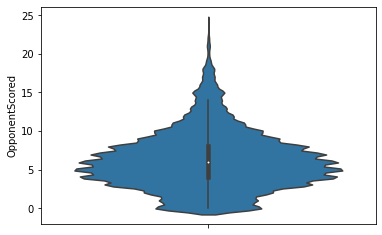

In [178]:
import seaborn as sns
ax = sns.violinplot(y="OpponentScored", data=df2)

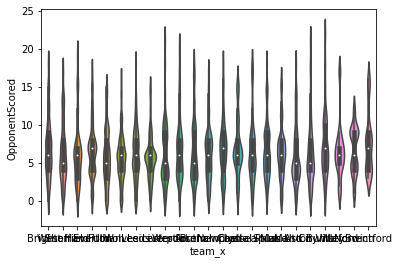

In [181]:
ax = sns.violinplot(x = "team_x", y="OpponentScored", data=df2)

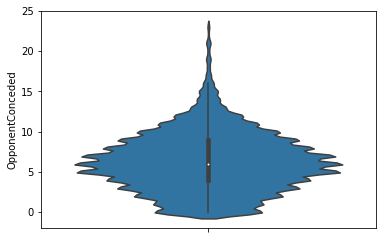

In [179]:
ax = sns.violinplot(y="OpponentConceded", data=df2)

In [180]:
df.to_excel('OppAdded.xlsx', index=False)